In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
from keras import callbacks
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [9]:
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [10]:
history = model.fit(partial_x_train, partial_y_train, validation_data=(x_val, y_val), epochs=20, callbacks=[es, mc])

Epoch 1/20
469/469 [==============================] - 20s 6ms/step - loss: 0.6488 - accuracy: 0.7227 - val_loss: 0.3437 - val_accuracy: 0.8811

Epoch 00001: val_accuracy improved from -inf to 0.88110, saving model to best_model.h5
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2106 - accuracy: 0.9449 - val_loss: 0.5172 - val_accuracy: 0.8696

Epoch 00002: val_accuracy did not improve from 0.88110
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1482 - accuracy: 0.9638 - val_loss: 0.6452 - val_accuracy: 0.8696

Epoch 00003: val_accuracy did not improve from 0.88110
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1161 - accuracy: 0.9819 - val_loss: 0.7941 - val_accuracy: 0.8673

Epoch 00004: val_accuracy did not improve from 0.88110
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0787 - accuracy: 0.9904 - val_loss: 1.0272 - val_accuracy: 0.8605

Epoch 00005: val_accuracy did no

Train: 0.996, Test: 0.862


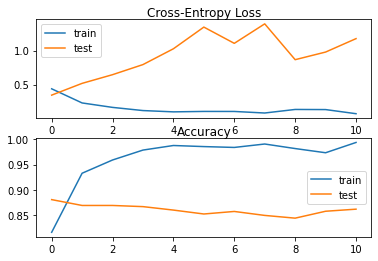

In [11]:
# evaluate the model
_, train_acc = model.evaluate(partial_x_train, partial_y_train, verbose=0)
_, test_acc = model.evaluate(x_val, y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Kesimpulan

Dengan menggunakan metode checkpoint diperoleh bahwa epoch 1 merupakan epoch yang paling optimal. Pada epoch 1 belum terjadi overfitting dan validation accuracy berada pada nilai yang tertinggi.